In [236]:
from matplotlib import pyplot as plt
import scipy as sc
import pandas
import math
import numpy as np
import lmfit
import os
from uncertainties import ufloat
import array_to_latex as atl

In [237]:
def gaus1(x,m,s,scale):
    return scale*1/(s**2*2*np.pi)**0.5 * math.e**(-(x-m)**2/(2.*s**2))
def gaus2(x,m1,m2,s1,s2,scale1,scale2):
    return scale1*1/(s1**2*2*np.pi)**0.5 * math.e**(-(x-m1)**2/(2.*s1**2))+ scale2*1/(s2**2*2*np.pi)**0.5 * math.e**(-(x-m2)**2/(2.*s2**2))
def gaus3(x,m1,m2,m3,s1,s2,s3,scale1,scale2,scale3):
    return scale1*1/(s1**2*2*np.pi)**0.5 * math.e**(-(x-m1)**2/(2.*s1**2))+ scale2*1/(s2**2*2*np.pi)**0.5 * math.e**(-(x-m2)**2/(2.*s2**2))+scale3*1/(s3**2*2*np.pi)**0.5 * math.e**(-(x-m3)**2/(2.*s3**2))

In [238]:
def pos(x):
    for i in range(len(data[0])):
        if data[0,i]>=x:
            return i
            break

FitFunktionen

In [239]:
def gaus1fit(m,mmin,mmax,von,bis,path): 
    model_gaus = lmfit.model.Model(gaus1)  
    pars_gaus = model_gaus.make_params()
    pars_gaus["m"].set(value=m,min=mmin,max=mmax)
    pars_gaus["s"].set(value=1,min=0)
    pars_gaus["scale"].set(value=1,min=0)

    vonarr = pos(von)
    bisarr = pos(bis)



    #Fitten
    out_gaus = model_gaus.fit(data[1,vonarr:bisarr],x=data[0,vonarr:bisarr],params=pars_gaus,weights=1/data[2,vonarr:bisarr],nan_policy='propagate')

    fig = plt.figure(figsize=(10,5),dpi=80,linewidth=50)
    plt.errorbar(data[0,vonarr:bisarr],data[1,vonarr:bisarr],yerr=data[2,vonarr:bisarr],fmt='o',ecolor='lightgray',color='r', elinewidth=3, capsize=0,zorder=5,label="Daten")
    plt.plot(np.arange(von,bis,0.01),out_gaus.eval(x=np.arange(von,bis,0.01)),zorder=10,color='k',linestyle='--',alpha=0.5,label="Gaus-Fit")
    


    plt.legend(fontsize=15)
    plt.savefig('Results/'+str(path)+'.pdf')

    print(out_gaus.fit_report())


def gaus2fit(m1,m1min,m1max,m2,m2min,m2max,von,bis,path): 
    model_gaus = lmfit.model.Model(gaus2)  
    pars_gaus = model_gaus.make_params()
    pars_gaus["m1"].set(value=m1,min=m1min,max=m1max)
    pars_gaus["s1"].set(value=1,min=0)
    pars_gaus["scale1"].set(value=1,min=0)

    pars_gaus["m2"].set(value=m2,min=m2min,max=m2max)
    pars_gaus["s2"].set(value=1,min=0)
    pars_gaus["scale2"].set(value=1,min=0)
    vonarr = pos(von)
    bisarr = pos(bis)



    #Fitten
    out_gaus = model_gaus.fit(data[1,vonarr:bisarr],x=data[0,vonarr:bisarr],params=pars_gaus,weights=1/data[2,vonarr:bisarr],nan_policy='propagate')

    fig = plt.figure(figsize=(10,5),dpi=80,linewidth=50)
    plt.errorbar(data[0,vonarr:bisarr],data[1,vonarr:bisarr],yerr=data[2,vonarr:bisarr],fmt='o',ecolor='lightgray',color='r', elinewidth=3, capsize=0,zorder=5,label="Daten")
    plt.plot(np.arange(von,bis,0.01),out_gaus.eval(x=np.arange(von,bis,0.01)),zorder=10,color='k',linestyle='--',alpha=0.5,label="Gaus-Fit")
    


    plt.legend(fontsize=15)
    plt.savefig('Results/'+str(path)+'.pdf')

    print(out_gaus.fit_report())

def gaus3fit(m1,m1min,m1max,m2,m2min,m2max,m3,m3min,m3max,von,bis,path):

    model_gaus = lmfit.model.Model(gaus3)  
    pars_gaus = model_gaus.make_params()
    pars_gaus["m1"].set(value=m1,min=m1min,max=m1max)
    pars_gaus["s1"].set(value=1,min=0)
    pars_gaus["scale1"].set(value=1,min=0)

    pars_gaus["m2"].set(value=m2,min=m2min,max=m2max)
    pars_gaus["s2"].set(value=1)
    pars_gaus["scale2"].set(value=1)

    pars_gaus["m3"].set(value=m3,min=m3min,max=m3max)
    pars_gaus["s3"].set(value=1,min=0)
    pars_gaus["scale3"].set(value=1,min=0)

    vonarr = pos(von)
    bisarr = pos(bis)



    #Fitten
    out_gaus = model_gaus.fit(data[1,vonarr:bisarr],x=data[0,vonarr:bisarr],params=pars_gaus,weights=1/data[2,vonarr:bisarr],nan_policy='propagate')

    fig = plt.figure(figsize=(10,5),dpi=80,linewidth=50)
    plt.errorbar(data[0,vonarr:bisarr],data[1,vonarr:bisarr],yerr=data[2,vonarr:bisarr],fmt='o',ecolor='lightgray',color='r', elinewidth=3, capsize=0,zorder=5,label="Daten")
    plt.plot(np.arange(von,bis,0.01),out_gaus.eval(x=np.arange(von,bis,0.01)),zorder=10,color='k',linestyle='--',alpha=0.5,label="Gaus-Fit")
    


    plt.legend(fontsize=15)
    plt.savefig('Results/'+str(path)+'.pdf')

    print(out_gaus.fit_report())


Daten einlesen und Standartfehler as Fehler der Counts festlegen

<ErrorbarContainer object of 3 artists>

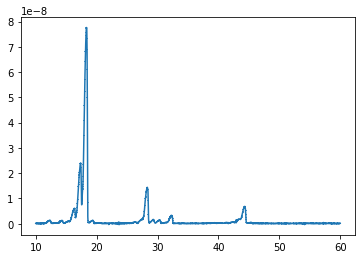

In [261]:

with open('Data/Restgas_1.csv', mode='r') as tf:
        dataex = np.genfromtxt((line.replace(',', '.') for line in tf),delimiter=";",skip_header=21).T
        data = np.zeros((2,len(dataex[3])))
        data[0],data[1] = dataex[3],dataex[4]

err = np.zeros(len(data[1]))
for i in range(len(err)):
    err[i] = 1e-10#(data[1,i])*0.3
data = np.vstack([data,err])

v = pos(10)
b = pos(60)
plt.errorbar(data[0,v:b],data[1,v:b],yerr=data[2,v:b],label = 'Data')


[[Model]]
    Model(gaus1)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 103
    # data points      = 54
    # variables        = 3
    chi-square         = 1173.83511
    reduced chi-square = 23.0163748
    Akaike info crit   = 172.268565
    Bayesian info crit = 178.235517
##  Warning: uncertainties could not be estimated:
    scale:  at boundary
[[Variables]]
    m:      16.2332632 (init = 16.1)
    s:      0.29398535 (init = 1)
    scale:  4.2623e-09 (init = 1)


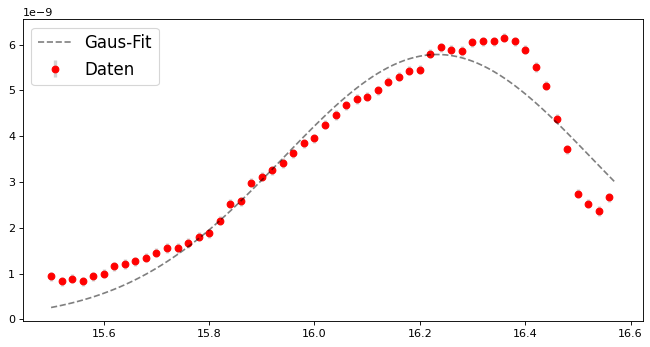

In [251]:
gaus1fit(16.1,15,16.25,15.5,16.57,'Restgas_1_16.2')

[[Model]]
    Model(gaus1)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 220
    # data points      = 55
    # variables        = 3
    chi-square         = 34262.3710
    reduced chi-square = 658.891749
    Akaike info crit   = 359.895838
    Bayesian info crit = 365.917838
[[Variables]]
    m:      17.2000000 +/- 8.6375e-05 (0.00%) (init = 17.1)
    s:      0.26955123 +/- 0.01088659 (4.04%) (init = 1)
    scale:  1.5231e-08 +/- 5.0827e-10 (3.34%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(s, scale) = 0.692
    C(m, s)     = 0.229
    C(m, scale) = 0.196


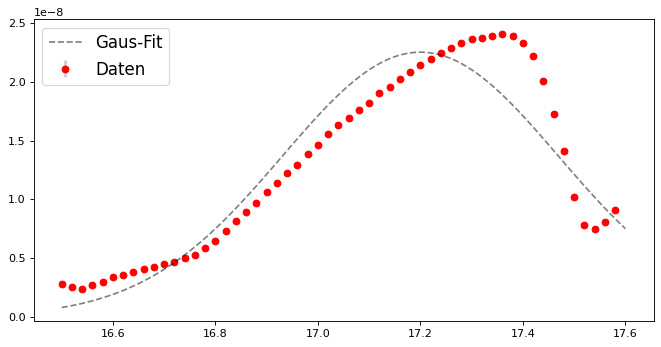

In [242]:
gaus1fit(17.1,16.5,17.2,16.5,17.6,'Restgas_1_17.2')

[[Model]]
    Model(gaus1)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 89
    # data points      = 75
    # variables        = 3
    chi-square         = 627165.441
    reduced chi-square = 8710.63112
    Akaike info crit   = 683.360815
    Bayesian info crit = 690.313279
[[Variables]]
    m:      18.2044139 +/- 0.00848261 (0.05%) (init = 18.25)
    s:      0.22316761 +/- 0.00848523 (3.80%) (init = 1)
    scale:  4.3685e-08 +/- 1.4053e-09 (3.22%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(s, scale) = 0.578


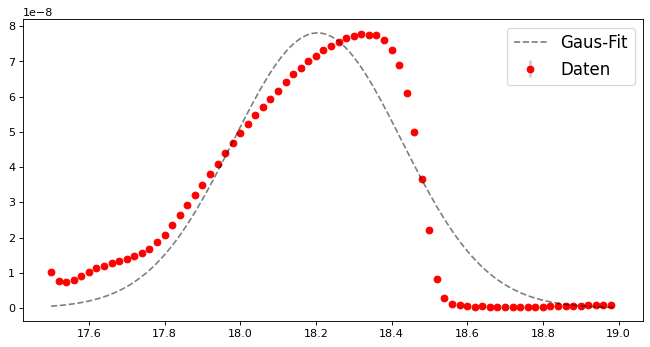

In [252]:
gaus1fit(18.25,17.9,18.5,17.5,19,'Restgas_1_18.2')

[[Model]]
    Model(gaus1)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 89
    # data points      = 75
    # variables        = 3
    chi-square         = 627165.441
    reduced chi-square = 8710.63112
    Akaike info crit   = 683.360815
    Bayesian info crit = 690.313279
[[Variables]]
    m:      18.2044139 +/- 0.00848261 (0.05%) (init = 18.25)
    s:      0.22316761 +/- 0.00848523 (3.80%) (init = 1)
    scale:  4.3685e-08 +/- 1.4053e-09 (3.22%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(s, scale) = 0.578


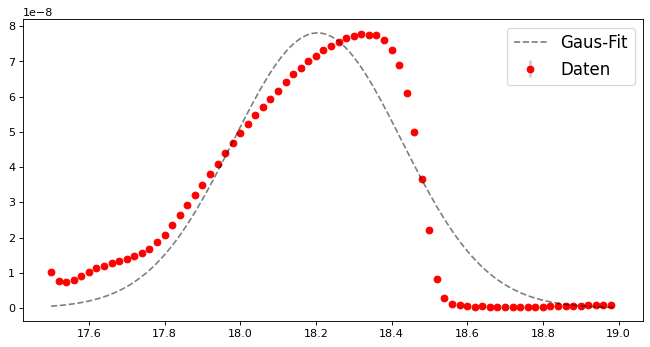

In [253]:
gaus1fit(18.25,17.9,18.5,17.5,19,'sauerstoff')

[[Model]]
    Model(gaus1)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 90
    # data points      = 63
    # variables        = 3
    chi-square         = 19193.1327
    reduced chi-square = 319.885544
    Akaike info crit   = 366.307905
    Bayesian info crit = 372.737309
[[Variables]]
    m:      28.1928314 +/- 0.00889924 (0.03%) (init = 28)
    s:      0.23358812 +/- 0.00901442 (3.86%) (init = 1)
    scale:  8.5663e-09 +/- 3.2635e-10 (3.81%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(s, scale) = 0.585


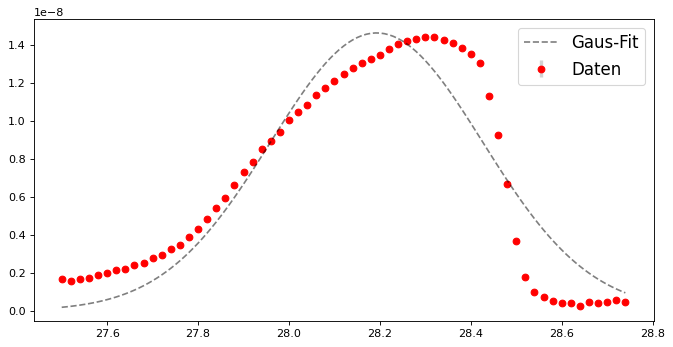

In [254]:
gaus1fit(28,27.5,28.75,27.5,28.75,'noch test')

[[Model]]
    Model(gaus1)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 101
    # data points      = 100
    # variables        = 3
    chi-square         = 1743.38012
    reduced chi-square = 17.9729909
    Akaike info crit   = 291.841092
    Bayesian info crit = 299.656602
##  Warning: uncertainties could not be estimated:
    scale:  at boundary
[[Variables]]
    m:      32.1734388 (init = 32)
    s:      0.27095358 (init = 1)
    scale:  2.2872e-09 (init = 1)


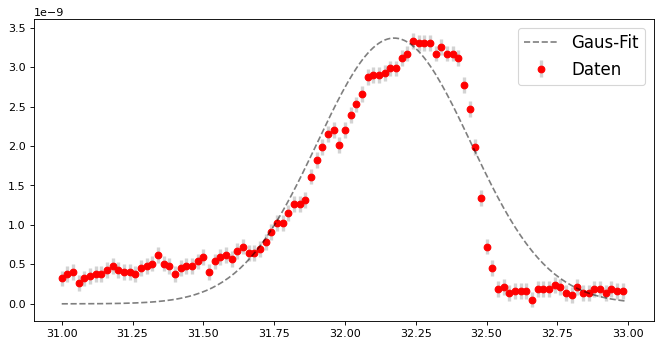

In [259]:
gaus1fit(32,31.75,32.5,31,33,'test')

In [245]:
x=np.array([[1,2,3,4,5],[123,23,345,456,9876]])
print(atl.to_ltx(x, frmt = '{:6.2f}', arraytype = 'tabular', print_out=False))

\begin{tabular}
    1.00 &    2.00 &    3.00 &    4.00 &    5.00\\
  123.00 &   23.00 &  345.00 &  456.00 &  9876.00
\end{tabular}
